# Image Classification with Data Augmentation

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow" 

import matplotlib.pyplot as plt
import keras

2024-06-30 17:06:27.372191: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-30 17:06:27.571628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 17:06:27.678219: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 17:06:27.679162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-30 17:06:27.845392: I tensorflow/core/platform/cpu_feature_gua

In [4]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
image_size = (128, 128)
batch_size = 10

train_ds = keras.utils.image_dataset_from_directory(
    "leaves",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 402 files belonging to 36 classes.


2024-06-30 17:07:12.522492: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 17:07:12.522628: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 17:07:12.522667: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 17:07:12.814364: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 17:07:12.814439: I external/local_xla/xla/stream_executor

In [6]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


tf.Tensor([11 28 18  4 35 12  1 20 31 29], shape=(10,), dtype=int32)


2024-06-30 17:07:24.185436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


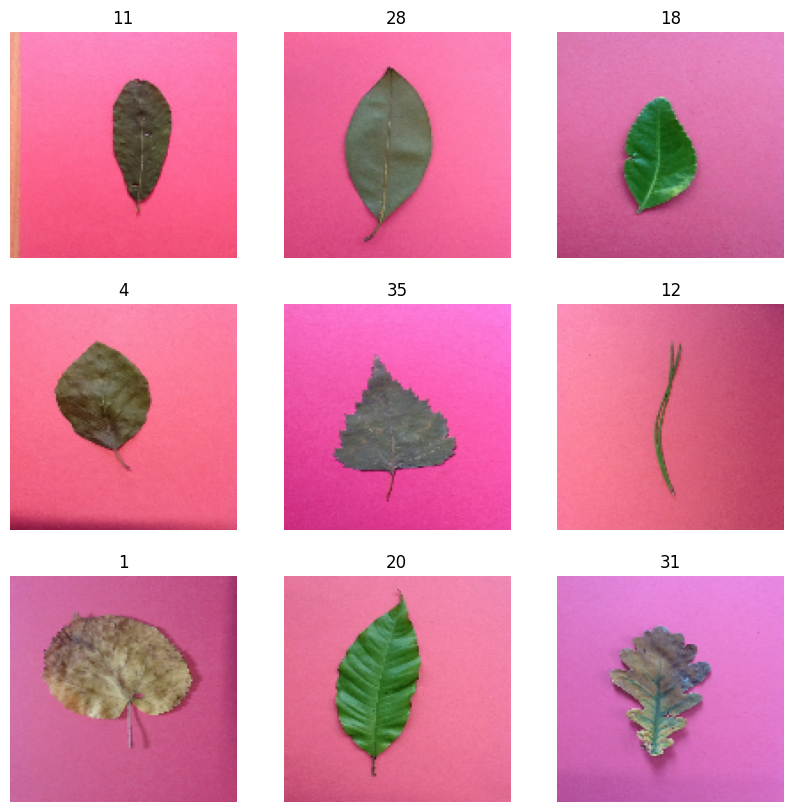

In [7]:
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    print(labels)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [8]:
from keras import layers

data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2)
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

2024-06-30 17:07:39.152421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


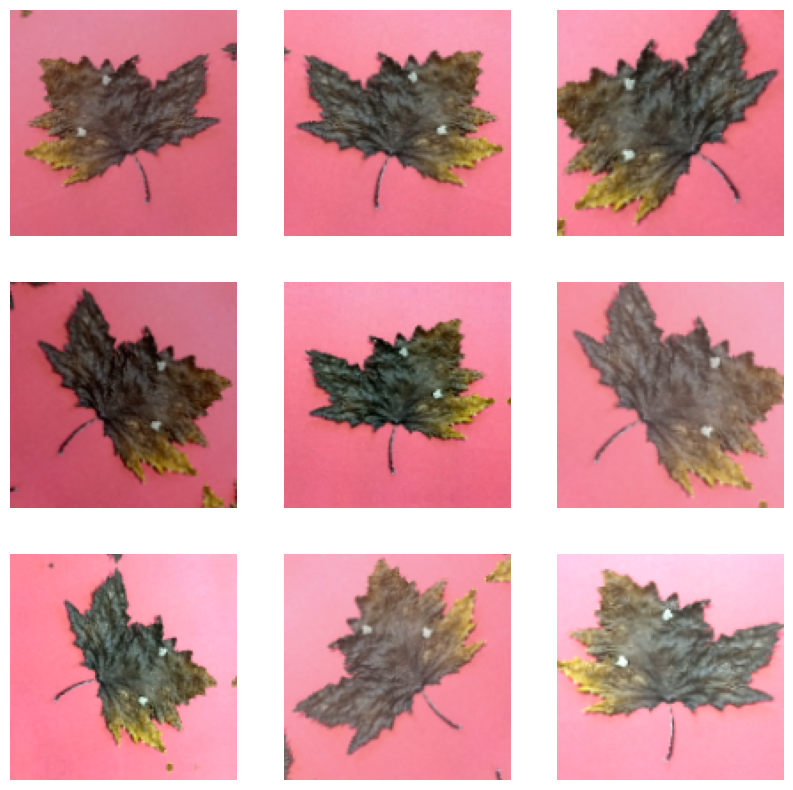

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [10]:
new_dataset = []

for i in range(5):
    
    augmented_train_ds = train_ds.map(
        lambda x, y: (data_augmentation(x), y))
    
    new_dataset.append(augmented_train_ds)


In [ ]:
def make_model():
    
    model = keras.Sequential()
    base_model = keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False)
    base_model.trainable = True
    
    model.add(layers.Input(shape=(128, 128, 3)))
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='elu'))
    model.add(layers.Dense(36, activation='softmax'))
    
    return model
    
model = make_model()

In [81]:
model.summary(show_trainable=True)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ mobilenetv2_1.00_128        │ (None, 4, 4, 1280)    │  2,257,984 │   Y   │
│ (Functional)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d_6  │ (None, 1280)          │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_19 (Dense)            │ (None, 256)           │    327,936 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_20 (Dense)            │ (None, 36)            │      9,252 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 2,595,172 (9.90 MB)

 Trainable params: 2,561,060 (9.77 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [86]:

model.compile(
    optimizer=keras.optimizers.Lion(learning_rate=0.00005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [87]:
histories = []

for dataset in new_dataset:
    history = model.fit(dataset, epochs=20)
    histories.append(history)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.7262 - loss: 0.8319
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.6998 - loss: 0.8671
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.7661 - loss: 0.7448
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.7241 - loss: 0.8064
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.7560 - loss: 0.7992
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.7762 - loss: 0.7312
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.7977 - loss: 0.6439
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.7992 - loss: 0.6584
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.7497 - loss: 0.7346
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 0.7995 - loss: 0.6114
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - accuracy: 0.8233 - loss: 0.4735
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/ste

In [93]:
accuracies = []

for history in histories :
    for accuracy in history.history['accuracy']:
        accuracies.append(accuracy)

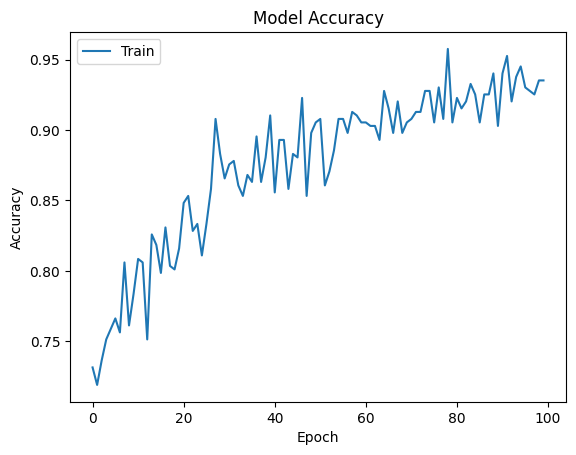

In [95]:
plt.plot(accuracies)

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()